## hard TH

In [33]:
import importlib
import SVM_hard
import plot_SVM
import generate_data

importlib.reload(SVM_hard)
importlib.reload(plot_SVM)
importlib.reload(generate_data)

<module 'generate_data' from 'd:\\education\\sem 9 SIGMA\\convex optimization\\lab 2\\code\\generate_data.py'>

In [34]:
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

# Generate separable data for two classes
seed= 42
n_samples = 40
X,y = generate_data.generate_uniform(n_samples,seed)

# Solve the dual problem
lambda_star, costs, gradient_norms,w_star,support_vectors,b_star = SVM_hard.solve_dual(X, y,tol=1e-4, step_size=1e-4)

# Plot the decision boundary, cost convergence, and gradient norms
plot_SVM.plot_svm_decision_boundary(X, y, w_star, b_star)
plot_SVM.plot_convergence(costs)
plot_SVM.plot_gradient_norms(gradient_norms)

Reached maximum iterations without convergence.


## soft TH

In [35]:
import numpy as np
import matplotlib.pyplot as plt


import importlib
import SVM_Soft
import plot_SVM

importlib.reload(SVM_Soft)
importlib.reload(plot_SVM)

# Generate toy data
def generate_gaussian_data(
    n_samples=100, mean1=[-1, -1], mean2=[1, 1], cov=[[1, 0], [0, 1]]
):
    """
    Generate two classes of overlapping data using 2D Gaussian distributions.
    """
    class1 = np.random.multivariate_normal(mean1, cov, n_samples)
    class2 = np.random.multivariate_normal(mean2, cov, n_samples)
    X = np.vstack((class1, class2))
    y = np.hstack(
        (np.ones(n_samples), -np.ones(n_samples))
    )  # +1 for class 1, -1 for class 2
    return X, y

# Main function

# Generate toy data
X, y = generate_gaussian_data()
#X, y = generate_data.generate_uniform(50,42)
w_star,b_star,costs = SVM_Soft.SVM_Train(X,y,lambda_ = 1.0,step_size = 1e-4 ,max_iter=1000, tol=1e-6)

# calculating
plot_SVM.plot_svm_decision_boundary(X, y, w_star,b_star)
plot_SVM.plot_convergence(costs=costs)

Reached maximum iterations without convergence.


In [36]:
from sklearn.svm import SVC
import numpy as np

def soft_svm_sklearn(X, y, C=1.0):
    # Initialize the SVC classifier with a linear kernel
    model = SVC(C=C, kernel='linear')
    
    # Fit the model on the data
    model.fit(X, y)
    
    # Retrieve the weights (w) and bias (b) from the trained model
    w = model.coef_.flatten()  # Coefficients (weights) of the model
    b = model.intercept_[0]    # Intercept (bias) of the model
    
    return w, b
w,b = soft_svm_sklearn(X,y)
plot_SVM.plot_svm_decision_boundary(X,y,w,b)

print(w[0]/w[1],b)
print(w_star[0]/w_star[1] , b_star)


0.840381616569178 -0.061096478704440314
1.3500698663350004 0.031959649422223506


# mnist Soft

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import importlib
import SVM_Soft
import plot_SVM
import Load_Data

importlib.reload(SVM_Soft)
importlib.reload(plot_SVM)
importlib.reload(Load_Data)

<module 'Load_Data' from 'd:\\education\\sem 9 SIGMA\\convex optimization\\lab 2\\code\\Load_Data.py'>

y of shape: (12665,)
X of shape: (784, 12665)
X_reduced of shape: (12665, 2)


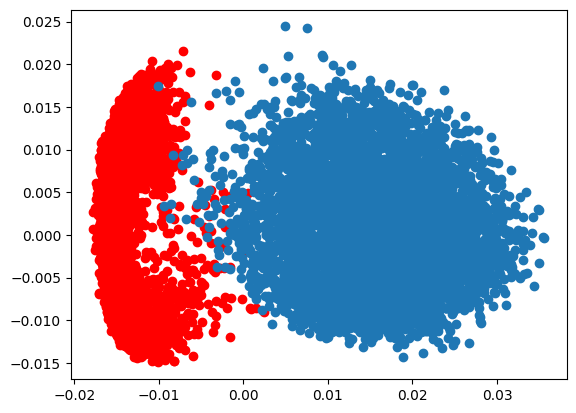

In [38]:
X,y = Load_Data.Load_Data_mnist()

def plot_data(X,y):
    index1 = np.where(y==1)[0]
    index2 = np.where(y==-1)[0]
    X_class1 = X[:,index1]
    X_class2 = X[:,index2]
    plt.scatter(X_class1[0],X_class1[1],c='red')
    plt.scatter(X_class2[0],X_class2[1])

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.T)
print("X_reduced of shape:",X_reduced.shape)
plot_data(X_reduced.T,y)

In [39]:
print(X_reduced.shape)
X_use = X_reduced[0:1000]
y_use = y[0:1000]
w_star,b_star,costs = SVM_Soft.SVM_Train(X_use,y_use,lambda_ = 1.0,step_size = 1e-6 ,max_iter=1000, tol=1e-6)

# calculating
plot_SVM.plot_svm_decision_boundary(X_use, y_use, w_star,b_star)
plot_SVM.plot_convergence(costs=costs)

(12665, 2)
Reached maximum iterations without convergence.
